In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Import both Dataset

In [ ]:
df1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Lim_solar_data.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Max_solar_data.csv')

df = pd.concat([df1,df2],ignore_index=True,axis=0)
df = df.iloc[:,1:] # Take the time column out
df.head()

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L


# Scale The Data

In [ ]:
scaler = StandardScaler()
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])

In [ ]:
df

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,-0.341169,0.569916,0.174295,-0.242455,0.780669,-0.532712,0.333532,-1.303352,1.220880,0.780398,0.095092,-24.688949,0.016969,F0L
1,-0.396011,0.565715,0.142153,0.239057,-0.792388,0.596697,-0.351632,1.281829,-1.231637,0.780398,0.095092,-24.688949,0.016969,F0L
2,-0.233052,0.556262,0.152867,-0.286229,0.748345,-0.457418,0.331665,-1.303873,1.221334,0.780398,0.095092,-24.688949,0.016969,F0L
3,-0.333334,0.567290,0.131439,0.282831,-0.738516,0.575185,-0.349961,1.292150,-1.241471,-0.186037,0.073998,-0.547833,3.801309,F0L
4,-0.273792,0.557050,0.163581,-0.286229,0.726797,-0.468175,0.330486,-1.305854,1.222920,-0.455116,-0.013922,-0.167851,9.352998,F0L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,0.968767,-0.035320,0.206437,1.231264,-1.158716,0.295521,-1.027558,1.229804,-0.215325,0.242663,0.051472,0.055322,-0.095288,F7M
21632,0.877886,-0.058689,0.217151,-1.322209,0.942284,0.026614,1.021152,-1.236314,0.199448,0.236409,0.089453,0.053598,0.028995,F7M
21633,0.932728,-0.042934,0.217151,1.216672,-1.147942,0.306278,-1.023628,1.228761,-0.213105,0.228145,0.154088,0.047366,0.040311,F7M
21634,1.073749,-0.046873,0.217151,-1.307618,0.931510,0.037371,1.015747,-1.244342,0.198043,0.225123,0.125580,0.046228,0.016170,F7M


# Using sliding window to create Input and Output

In [ ]:
win_len = 10
stride = 1

In [ ]:
df_temp = df[df['label']=='F0M']

In [ ]:
df_temp

,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
10935,0.979735,0.100169,0.313577,1.391768,-0.857034,-0.220780,-1.196860,1.032965,0.279438,0.780398,0.095092,-24.688949,0.016969,F0M
10936,0.993837,0.097543,0.324291,-1.424348,0.909961,0.112665,1.204111,-1.043958,-0.288110,0.780398,0.095092,-24.688949,0.016969,F0M
10937,0.986003,0.101482,0.335005,1.362585,-0.867809,-0.263805,-1.188901,1.033486,0.285239,0.780398,0.095092,-24.688949,0.016969,F0M
10938,0.978168,0.099906,0.324291,-1.438939,0.909961,0.101908,1.194285,-1.042707,-0.303700,-0.223435,0.116185,-5.896742,-3.778340,F0M
10939,0.967200,0.100432,0.324291,1.420950,-0.846260,-0.231536,-1.174653,1.038908,0.291675,0.096962,0.161919,-10.424015,-19.010500,F0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12341,0.644417,0.127214,0.270721,1.158307,-1.126393,0.241740,-0.889799,1.319674,-0.466355,0.291560,0.093851,0.085752,0.313944,F0M
12342,0.664786,0.130103,0.270721,-1.103340,1.211643,-0.392881,0.907269,-1.291571,0.503820,0.294454,0.077690,0.089229,-0.044963,F0M
12343,0.738431,0.097806,0.302863,1.114534,-1.147942,0.241740,-0.877516,1.320300,-0.467760,0.289405,0.105481,0.122722,0.167357,F0M
12344,0.910791,0.094392,0.270721,-1.088749,1.211643,-0.414393,0.902454,-1.290424,0.505044,0.289383,0.096021,0.115834,-0.388128,F0M


In [ ]:
X = []
Y = []


i = 0
X.append(df_temp.iloc[i:i+win_len,:-1])
Y.append(df_temp.iloc[i+win_len,-1])

X,Y

([            Ipv       Vpv       Vdc        ia        ib        ic        va  \
  10935  0.979735  0.100169  0.313577  1.391768 -0.857034 -0.220780 -1.196860   
  10936  0.993837  0.097543  0.324291 -1.424348  0.909961  0.112665  1.204111   
  10937  0.986003  0.101482  0.335005  1.362585 -0.867809 -0.263805 -1.188901   
  10938  0.978168  0.099906  0.324291 -1.438939  0.909961  0.101908  1.194285   
  10939  0.967200  0.100432  0.324291  1.420950 -0.846260 -0.231536 -1.174653   
  10940  1.003239  0.103583  0.324291 -1.438939  0.909961  0.101908  1.202146   
  10941  0.971900  0.139293  0.324291  1.420950 -0.846260 -0.220780 -1.174948   
  10942  0.960932  0.084415  0.324291 -1.453530  0.909961  0.091152  1.201851   
  10943  0.993837  0.074699  0.335005  1.406359 -0.857034 -0.220780 -1.176716   
  10944  0.976601  0.075750  0.324291 -1.468122  0.931510  0.091152  1.202047   
  
               vb        vc      Iabc        If       Vabc         Vf  
  10935  1.032965  0.279438  0.780

In [ ]:
np.arange(0,len(df_temp)-(win_len),1)

array([   0,    1,    2, ..., 1398, 1399, 1400])

In [ ]:
win_len=100

X=[]
Y=[]

for i in np.arange(0,len(df_temp)-(win_len),stride):
            X.append(df_temp.iloc[i:i+win_len,:-1])
            Y.append(df_temp.iloc[i+win_len,-1])

X=np.array(X)
X.shape

(1311, 100, 13)

In [ ]:
df['label'].unique()

array(['F0L', 'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L', 'F0M',
       'F1M', 'F2M', 'F3M', 'F4M', 'F5M', 'F6M', 'F7M'], dtype=object)

In [ ]:
X = []
Y = []

no_classes = len(df['label'].unique())

for k in ['L','M']:

    for j in range(0,8):
          df_temp = df[df['label']== 'F{}{}'.format(j,k)]

          for i in np.arange(0,len(df_temp)-(win_len),stride):
            X.append(df_temp.iloc[i:i+win_len,:-1])
            Y.append(df_temp.iloc[i+win_len,-1])

X = np.array(X)
X=X.reshape((X.shape[0],X.shape[1],X.shape[2],1))

Y=np.array(Y)
encoder = LabelEncoder()
encoded_Y = encoder.fit_transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [ ]:
Y[0]

'F0L'

In [ ]:
encoded_Y[0]

0

In [ ]:
OHE_Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.2,shuffle=True)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
X_test.shape

(4008, 100, 13, 1)

# CNN Model

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

cnn_model = Sequential()
cnn_model.add(Conv2D(32,kernel_size=(20,3), activation='relu',input_shape=(X.shape[1],X.shape[2],1),padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(20,2), strides=(5,5), padding='same'))

cnn_model.add(Conv2D(64,kernel_size=(10,3), activation='relu',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(10,2), strides=(3,3), padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 13, 32)       1952      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 3, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 3, 64)         61504     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 448)               0         
                                                                 
 dense (Dense)               (None, 128)              

# Training the CNN

In [ ]:
batch_size = 400
epochs = 10
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=2,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/10
41/41 - 32s - loss: 1.1807 - accuracy: 0.6516 - val_loss: 0.3351 - val_accuracy: 0.8341 - 32s/epoch - 785ms/step
Epoch 2/10
41/41 - 34s - loss: 0.1925 - accuracy: 0.9234 - val_loss: 0.1666 - val_accuracy: 0.9291 - 34s/epoch - 832ms/step
Epoch 3/10
41/41 - 36s - loss: 0.0898 - accuracy: 0.9676 - val_loss: 0.0739 - val_accuracy: 0.9800 - 36s/epoch - 877ms/step
Epoch 4/10
41/41 - 32s - loss: 0.0556 - accuracy: 0.9851 - val_loss: 0.0724 - val_accuracy: 0.9681 - 32s/epoch - 769ms/step
Epoch 5/10
41/41 - 30s - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0212 - val_accuracy: 0.9958 - 30s/epoch - 732ms/step
Epoch 6/10
41/41 - 37s - loss: 0.0146 - accuracy: 0.9986 - val_loss: 0.0139 - val_accuracy: 0.9973 - 37s/epoch - 914ms/step
Epoch 7/10
41/41 - 41s - loss: 0.0090 - accuracy: 0.9998 - val_loss: 0.0093 - val_accuracy: 0.9998 - 41s/epoch - 1s/step
Epoch 8/10
41/41 - 33s - loss: 0.0071 - accuracy: 0.9999 - val_loss: 0.0052 - val_accuracy: 1.0000 - 33s/epoch - 816ms/step
Epoch 9/10


In [ ]:
cnn_model.save(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/Trained_models/CNN.h5')

In [ ]:
# from tensorflow.keras.models import load_model
# cnn_model = load_model()

# Evaluating Performance of the CNN

126/126 [==============================] - 4s 29ms/step


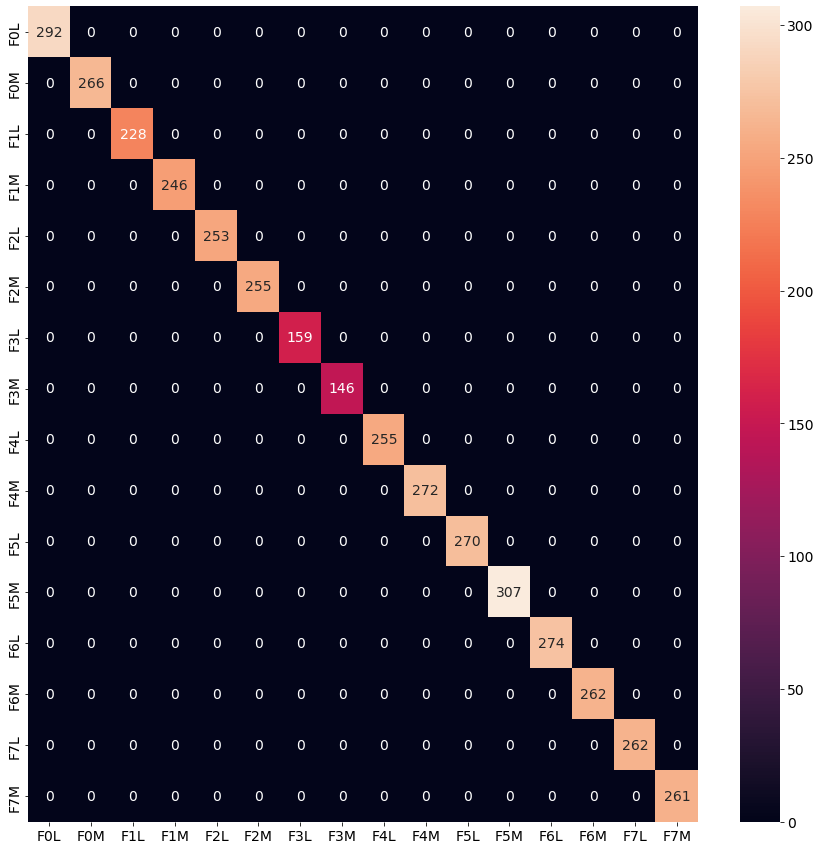

In [ ]:
def inv_transform_result(y_pred):
  y_pred = y_pred.argmax(axis=1)
  y_pred = encoder.inverse_transform(y_pred)
  return y_pred


y_pred=cnn_model.predict(X_test)

Y_pred=inv_transform_result(y_pred)
Y_test = inv_transform_result(y_test)

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15,15))
cm = confusion_matrix(Y_test, Y_pred)
f = sns.heatmap(cm, annot=True,fmt='d',xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()